<a href="https://colab.research.google.com/github/ambastashubham/learning1/blob/master/Catch_Lens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.optimizers import RMSprop,SGD
import pandas.util.testing as tm

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/A_Z Handwritten Data.csv").astype('float32')
dataset.head() 

In [ ]:
dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label

X = dataset.drop('label',axis = 1)
y = dataset['label']

In [ ]:
print(X.shape)

print(y.shape)


(372450, 784)
(372450,)


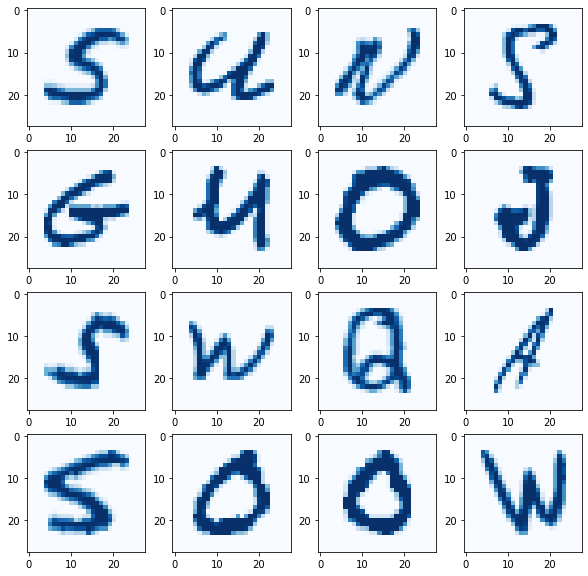

In [ ]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (10,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Blues')
plt.show()

In [ ]:
# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

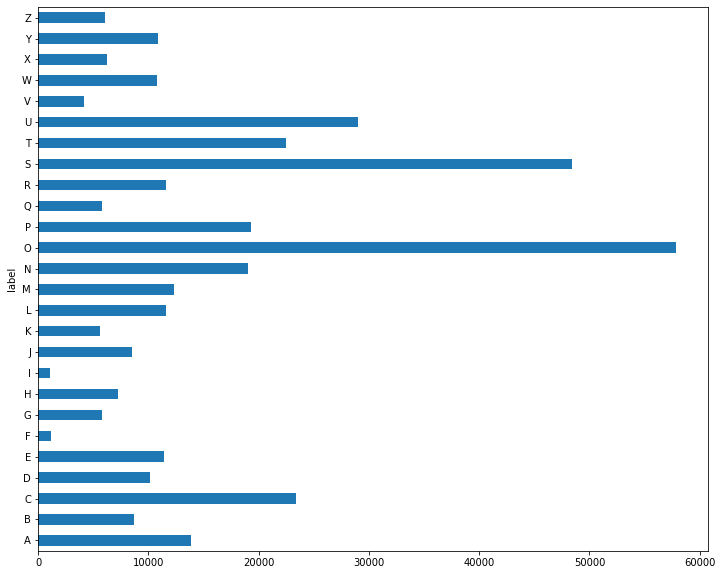

In [ ]:
label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(12,10))
plt.show()

In [ ]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape


(279337, 784)

In [ ]:
# scale data
standard_scaler = MinMaxScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


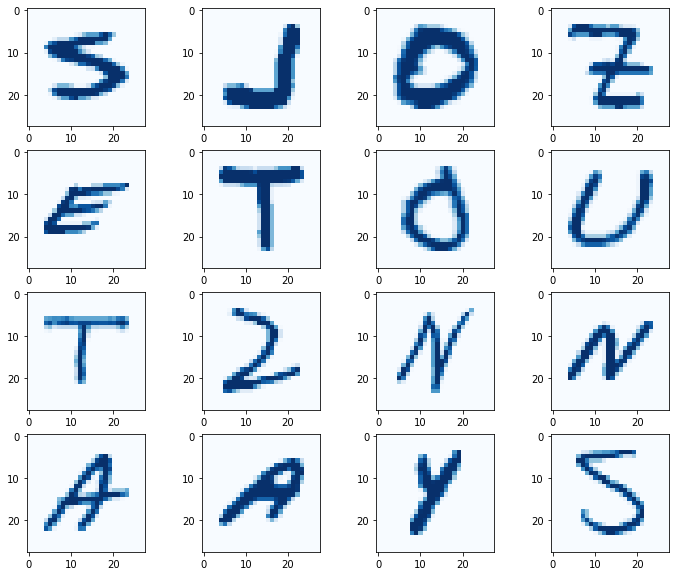

In [ ]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Blues')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_train.shape

(279337, 28, 28, 1)

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape

(279337, 26)

In [ ]:
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(26, activation='softmax'))

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

Train on 279337 samples, validate on 93113 samples
Epoch 1/30
 - 26s - loss: 0.2025 - accuracy: 0.9425 - val_loss: 0.0977 - val_accuracy: 0.9723
Epoch 2/30
 - 19s - loss: 0.0712 - accuracy: 0.9802 - val_loss: 0.0783 - val_accuracy: 0.9788
Epoch 3/30
 - 19s - loss: 0.0545 - accuracy: 0.9849 - val_loss: 0.0592 - val_accuracy: 0.9846
Epoch 4/30
 - 19s - loss: 0.0445 - accuracy: 0.9874 - val_loss: 0.0579 - val_accuracy: 0.9847
Epoch 5/30
 - 19s - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.0472 - val_accuracy: 0.9877
Epoch 6/30
 - 19s - loss: 0.0320 - accuracy: 0.9909 - val_loss: 0.0457 - val_accuracy: 0.9881
Epoch 7/30
 - 19s - loss: 0.0272 - accuracy: 0.9922 - val_loss: 0.0426 - val_accuracy: 0.9895
Epoch 8/30
 - 19s - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0409 - val_accuracy: 0.9892
Epoch 9/30
 - 19s - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0389 - val_accuracy: 0.9901
Epoch 10/30
 - 19s - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0400 - val_accuracy: 0.9895
Epoch 11

In [ ]:
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

CNN Score: 0.9953175187110901


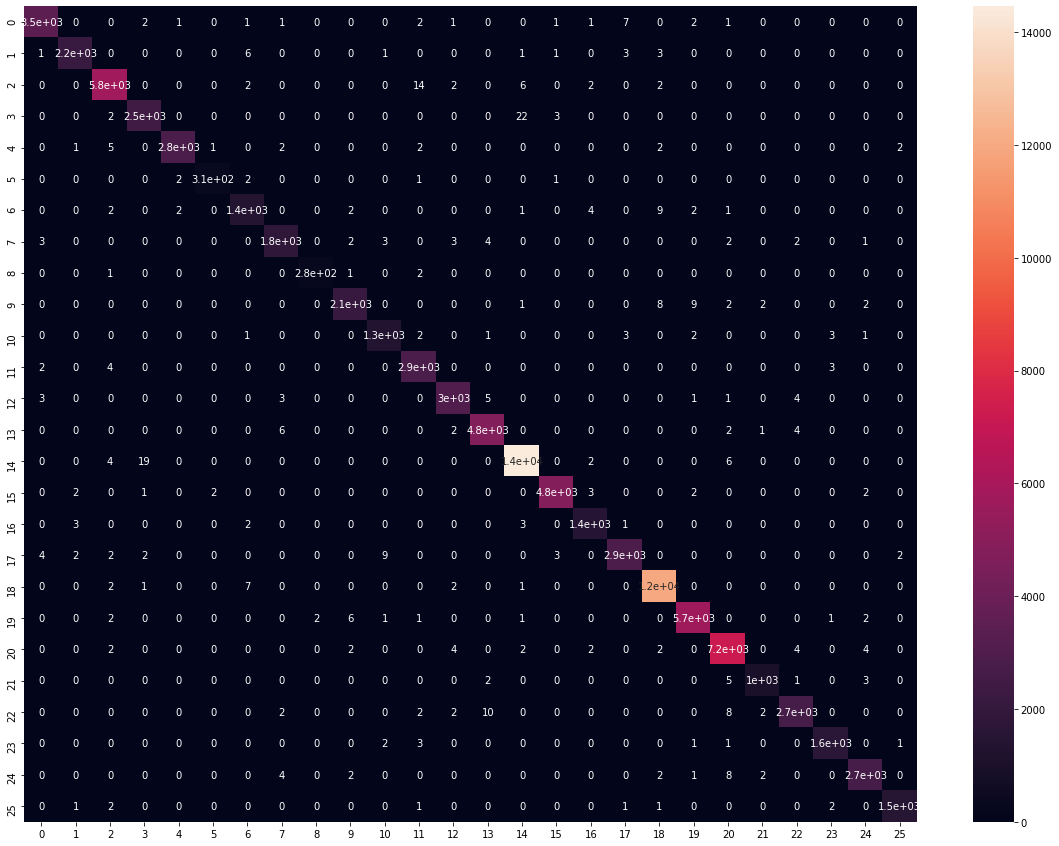

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.heatmap(df_cm,annot=True)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

In [ ]:
model.save('A_Z_Handwritten_Model.h5')

In [ ]:
from keras.models import load_model
new_model = load_model('A_Z_Handwritten_Model.h5')

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
!pwd
!ls

2.2.0
/content
A_Z_Handwritten_Model.h5  drive  sample_data
